In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("data/nyt-ai-sentiment.csv")
df

,pub_date,text,sentiment,sentiment_score
0,2000-02-03 05:00:00+00:00,"Hospitals nationwide, faced with growing conce...",neutral,0.677050
1,2000-06-18 05:00:00+00:00,Gerald Jonas reviews books Evolution's Darling...,neutral,0.637411
2,2000-07-25 05:00:00+00:00,Dr David B Fogel describes how computer progra...,neutral,0.595080
3,2000-07-29 05:00:00+00:00,Correction of July 17 article on Microsoft's p...,neutral,0.569639
4,2000-09-10 05:00:00+00:00,London Science Museum opens addition that expl...,neutral,0.819440
...,...,...,...,...
1006,2024-12-26 10:01:51+00:00,"As the technology is widely adopted, some once...",neutral,0.516346
1007,2024-12-28 12:00:03+00:00,The biggest thing holding America back from do...,negative,0.560552
1008,2024-12-29 08:00:41+00:00,"Frank Kendall, who grew up on an apple farm an...",neutral,0.649524
1009,2025-04-01 09:02:51+00:00,Advances in genetic testing and artificial int...,neutral,0.683855


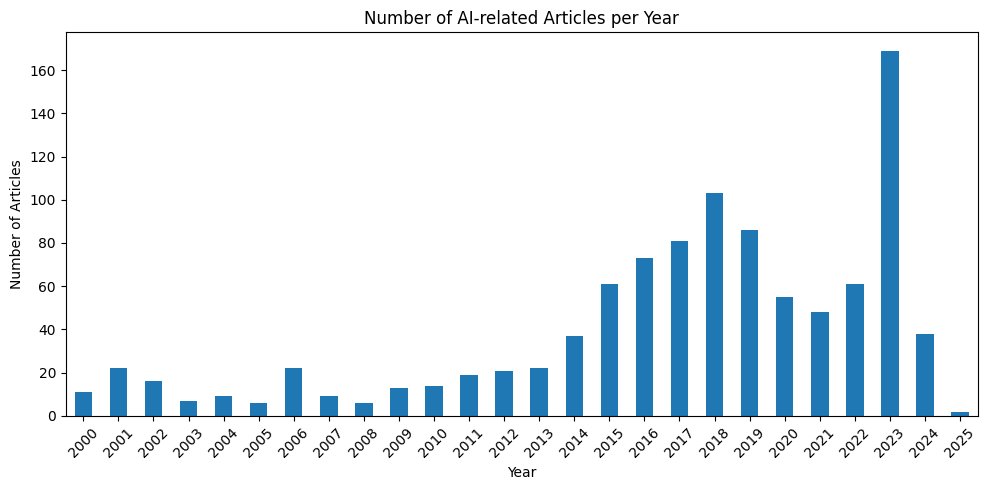

In [12]:
# plot the number of articles per year from 2000 to 2025
df['year'] = pd.to_datetime(df['pub_date']).dt.year
df['year'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5))
plt.title('Number of AI-related Articles per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('nyt_articles_per_year.png')
plt.show()

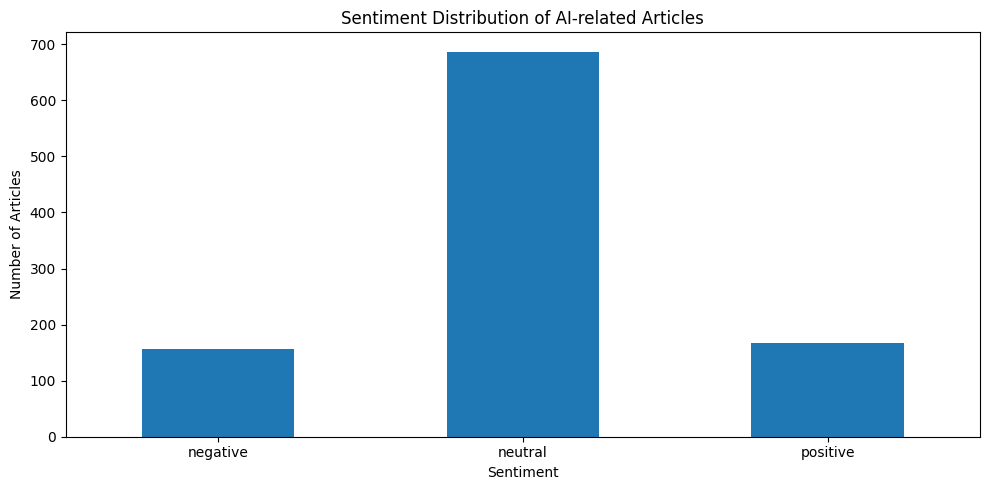

In [ ]:
df['sentiment'] = df['sentiment']
df['sentiment'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5))
plt.title('Sentiment Distribution of AI-related Articles')
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('nyt_sentiment_distribution.png')
plt.show()

C:\Users\bogda\AppData\Local\Temp\ipykernel_11620\66069948.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sentiment'] = df['sentiment'].replace({'positive': 1, 'neutral': 0, 'negative': -1})


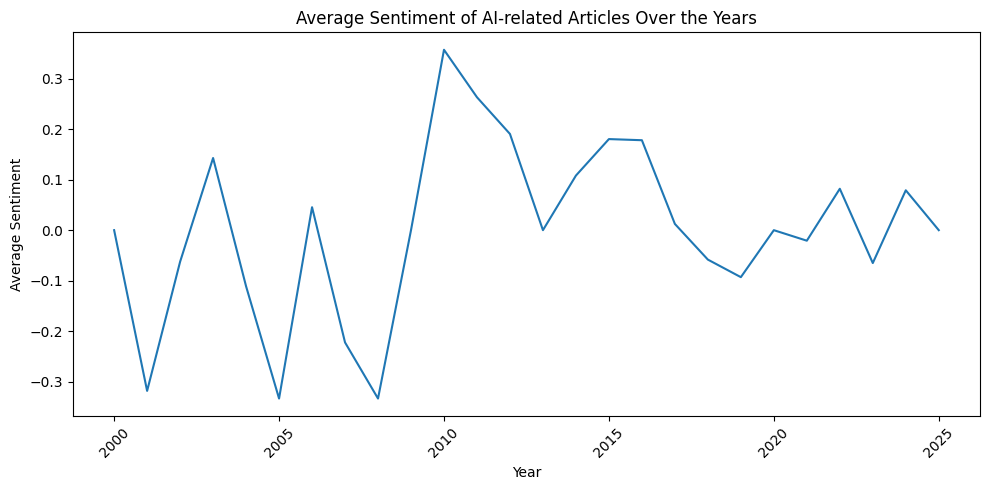

In [14]:
# plot how the sentiment changes over the years
df['sentiment'] = df['sentiment'].replace({'positive': 1, 'neutral': 0, 'negative': -1})
df['sentiment'].groupby(df['year']).mean().plot(kind='line', figsize=(10, 5))
plt.title('Average Sentiment of AI-related Articles Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('nyt_sentiment_over_years.png')
plt.show()


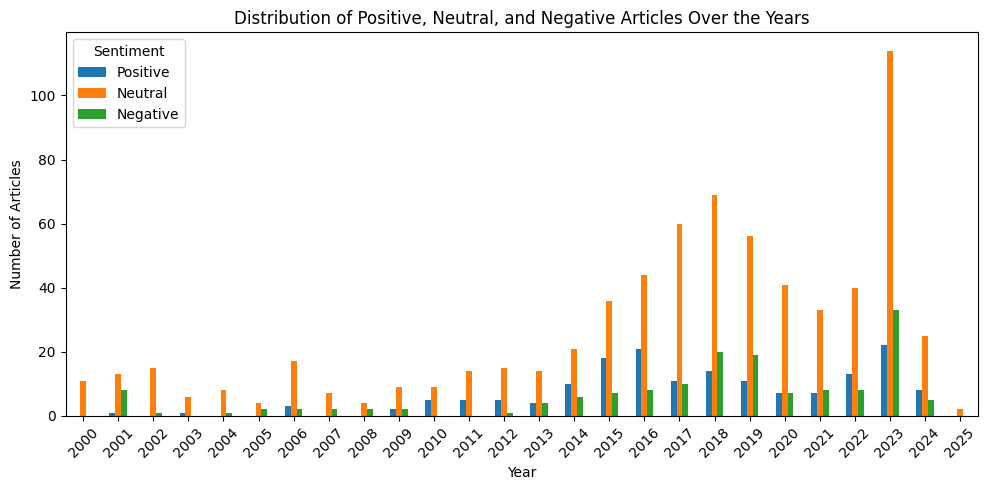

In [19]:
import matplotlib.pyplot as plt

# Replace sentiment values with numeric labels (if not already done)
df['sentiment'] = df['sentiment'].replace({'positive': 1, 'neutral': 0, 'negative': -1})

# Group and unstack to prepare the data
sentiment_counts = df['sentiment'].groupby(df['year']).value_counts().unstack()

# Optional: Sort columns so the sentiment order is consistent
sentiment_counts = sentiment_counts[[1, 0, -1]]  # positive, neutral, negative

# Plot as grouped bars
sentiment_counts.plot(kind='bar', figsize=(10, 5))  # no stacked=True

# Customize plot
plt.title('Distribution of Positive, Neutral, and Negative Articles Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.legend(title='Sentiment', labels=['Positive', 'Neutral', 'Negative'])
plt.tight_layout()
plt.savefig('nyt_sentiment_distribution_over_years.png')
plt.show()
